In [601]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import csv
import seaborn as sns
import datetime


In [623]:
final_csv = pd.read_csv("final_csv.csv")
final_csv.head()    

In [428]:
arrival_delayed = final_csv.loc[final_csv["ARR_DEL15"] == 1 ,:]
arrival_delayed.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016
5,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,DL,43.0,...,1,0.0,ATL,10397,Atlanta,GA,0.0,DL,0.0,2016
6,19790,37.0,1.0,NaN,74.0,1644.0,NaN,0.0,DL,3.0,...,1,0.0,BNA,10693,Nashville,TN,0.0,DL,0.0,2016
45,19790,192.0,1.0,NaN,28.0,1653.0,NaN,0.0,DL,28.0,...,1,0.0,MSP,13487,Minneapolis,MN,0.0,DL,0.0,2016
60,19790,47.0,1.0,NaN,31.0,1148.0,NaN,0.0,DL,14.0,...,1,0.0,ORD,13930,Chicago,IL,0.0,DL,17.0,2016


In [429]:
arrival_delayed.columns

Index(['AIRLINE_ID', 'AIR_TIME', 'ARR_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_TIME', 'CANCELLATION_CODE', 'CANCELLED', 'CARRIER',
       'CARRIER_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'DAY_OF_MONTH',
       'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_TIME',
       'DEST', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DISTANCE', 'DIVERTED', 'DIV_ACTUAL_ELAPSED_TIME',
       'DIV_AIRPORT_LANDINGS', 'DIV_ARR_DELAY', 'DIV_REACHED_DEST', 'FLIGHTS',
       'FL_DATE', 'FL_NUM', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'NAS_DELAY',
       'ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'SECURITY_DELAY', 'UNIQUE_CARRIER', 'WEATHER_DELAY', 'YEAR'],
      dtype='object')

In [482]:
arrival_delayFldate = arrival_delayed.groupby("FL_DATE",as_index=False)
arrival_delayFldate = arrival_delayFldate ["ARR_DELAY_NEW"].count()
arrival_delayFldate.head()


,FL_DATE,ARR_DELAY_NEW
0,2016-01-01,1667
1,2016-01-02,2291
2,2016-01-03,3612
3,2016-01-04,3231
4,2016-01-05,2838


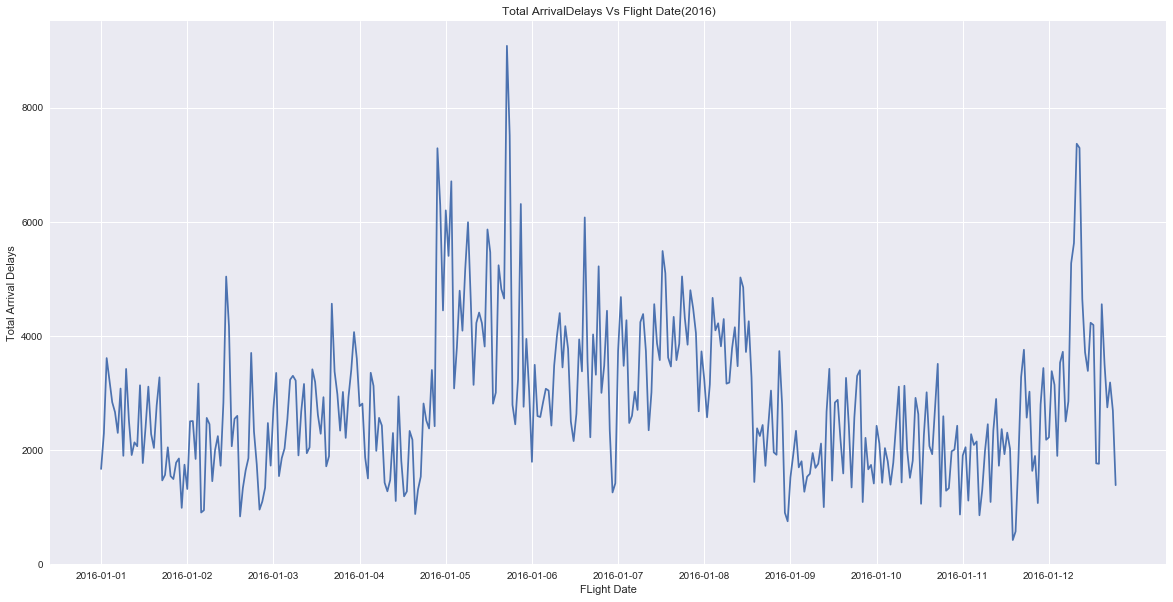

In [483]:
plt.figure(figsize=(20,10))
plt.plot(arrival_delayFldate["FL_DATE"], arrival_delayFldate["ARR_DELAY_NEW"])
plt.locator_params(axis='x', nbins = 12)
plt.xlabel("FLight Date")
plt.ylabel("Total Arrival Delays")
plt.title("Total ArrivalDelays Vs Flight Date(2016)")
plt.show()

In [432]:
arrival_delaydayofweek = arrival_delayed.groupby("DAY_OF_WEEK",as_index=False)
arrival_delaydayofweek = arrival_delaydayofweek["ARR_DELAY_NEW"].mean()
arrival_delaydayofweek["Day"]=["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
arrival_delaydayofweek


,DAY_OF_WEEK,ARR_DELAY_NEW,Day
0,1,61.812167,Mon
1,2,61.768127,Tues
2,3,60.650226,Wed
3,4,60.508677,Thurs
4,5,62.205637,Fri
5,6,64.239121,Sat
6,7,62.253487,Sun


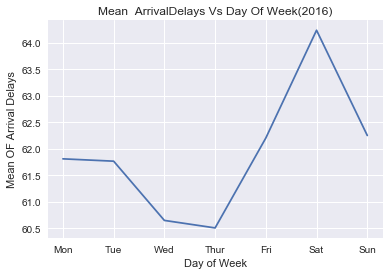

In [433]:
plt.plot(arrival_delaydayofweek ['DAY_OF_WEEK'],arrival_delaydayofweek["ARR_DELAY_NEW"])
plt.xticks(np.arange(1,8),("Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"))
plt.xlabel("Day of Week")
plt.ylabel("Mean OF Arrival Delays")
sns.set()
plt.title("Mean  ArrivalDelays Vs Day Of Week(2016)")
plt.show()

In [434]:
arrival_delaybymonth = arrival_delayed.groupby('MONTH',as_index=False)
arrival_delaybymonth = arrival_delaybymonth ["ARR_DELAY_NEW"].mean()
arrival_delaybymonth 
arrival_delaybymonth["Mth"]=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
arrival_delaybymonth


,MONTH,ARR_DELAY_NEW,Mth
0,1,58.154807,Jan
1,2,64.777691,Feb
2,3,58.878877,Mar
3,4,57.782771,Apr
4,5,58.501073,May
5,6,63.772182,Jun
6,7,71.282181,Jul
7,8,67.894722,Aug
8,9,57.584697,Sept
9,10,55.357145,Oct


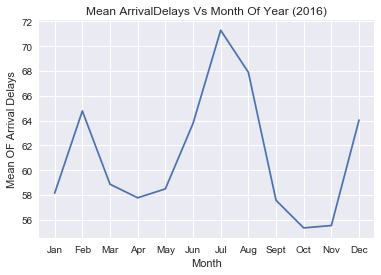

In [435]:
plt.plot(arrival_delaybymonth ['MONTH'],arrival_delaybymonth["ARR_DELAY_NEW"])
plt.xticks(np.arange(1,13),("Jan", "Feb", "Mar", "Apr", "May", 'Jun', "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"))
plt.xlabel("Month")
plt.ylabel("Mean OF Arrival Delays")
plt.title("Mean ArrivalDelays Vs Month Of Year (2016)")
sns.set()
plt.show()


In [164]:
arrival_delaydaymonth = arrival_delayed.groupby('DAY_OF_MONTH',as_index=False)
arrival_delaydaymonth = arrival_delaydaymonth ["ARR_DELAY_NEW"].mean()
arrival_delaydaymonth.head()


,DAY_OF_MONTH,ARR_DELAY_NEW
0,1,62.009013
1,2,65.455976
2,3,54.615127
3,4,61.914667
4,5,61.210086


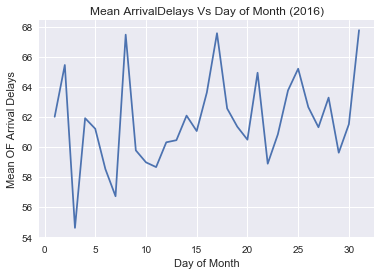

In [284]:

plt.plot(arrival_delaydaymonth['DAY_OF_MONTH'],arrival_delaydaymonth["ARR_DELAY_NEW"])
plt.xlabel("Day of Month")

plt.ylabel("Mean OF Arrival Delays")
plt.title("Mean ArrivalDelays Vs Day of Month (2016)")
plt.show()

In [166]:
cancelled_flights = final_csv.loc[final_csv["CANCELLED"] == 1 ,:]
cancelled_flights.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
4587,19790,NaN,NaN,NaN,NaN,NaN,A,1.0,DL,NaN,...,1,NaN,SFO,14771,San Francisco,CA,NaN,DL,NaN,2016
4760,19790,NaN,NaN,NaN,NaN,NaN,C,1.0,DL,NaN,...,1,NaN,LAS,12889,Las Vegas,NV,NaN,DL,NaN,2016
6605,20409,NaN,NaN,NaN,NaN,NaN,A,1.0,B6,NaN,...,1,NaN,ABQ,10140,Albuquerque,NM,NaN,B6,NaN,2016
6793,20409,NaN,NaN,NaN,NaN,NaN,A,1.0,B6,NaN,...,1,NaN,PVD,14307,Providence,RI,NaN,B6,NaN,2016
6818,20409,NaN,NaN,NaN,NaN,NaN,A,1.0,B6,NaN,...,1,NaN,JFK,12478,New York,NY,NaN,B6,NaN,2016


In [486]:
total_cancelFldate = cancelled_flights.groupby("FL_DATE",as_index=False)
total_cancelFldate = total_cancelFldate ["FLIGHTS"].count()
total_cancelFldate.head()

,FL_DATE,FLIGHTS
0,2016-01-01,57
1,2016-01-02,52
2,2016-01-03,97
3,2016-01-04,87
4,2016-01-05,204


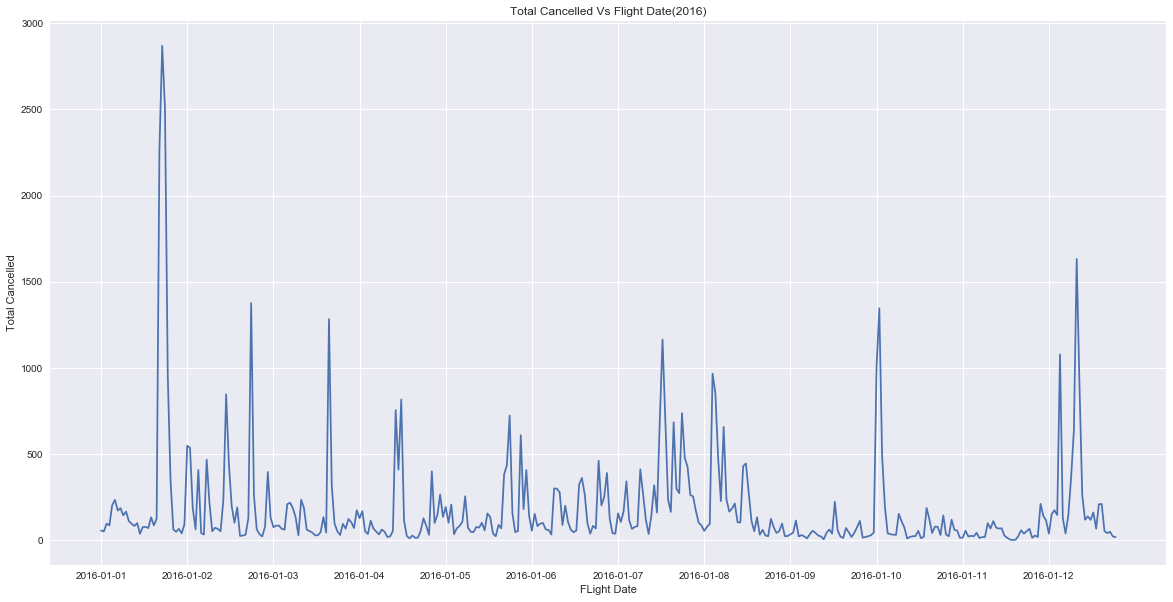

In [488]:
plt.figure(figsize=(20,10))
plt.plot(total_cancelFldate["FL_DATE"], total_cancelFldate["FLIGHTS"])
plt.locator_params(axis='x', nbins = 12)
plt.xlabel("FLight Date")
plt.ylabel("Total Cancelled")
plt.title("Total Cancelled Vs Flight Date(2016)")
plt.show()

In [436]:
cancelled_byday = cancelled_flights.groupby(["FL_DATE","CANCELLATION_CODE"],as_index=False)
cancelled_byday = cancelled_byday ["FLIGHTS"].count()
cancelled_byday.head()

,FL_DATE,CANCELLATION_CODE,FLIGHTS
0,2016-01-01,A,35
1,2016-01-01,B,9
2,2016-01-01,C,13
3,2016-01-02,A,37
4,2016-01-02,B,11


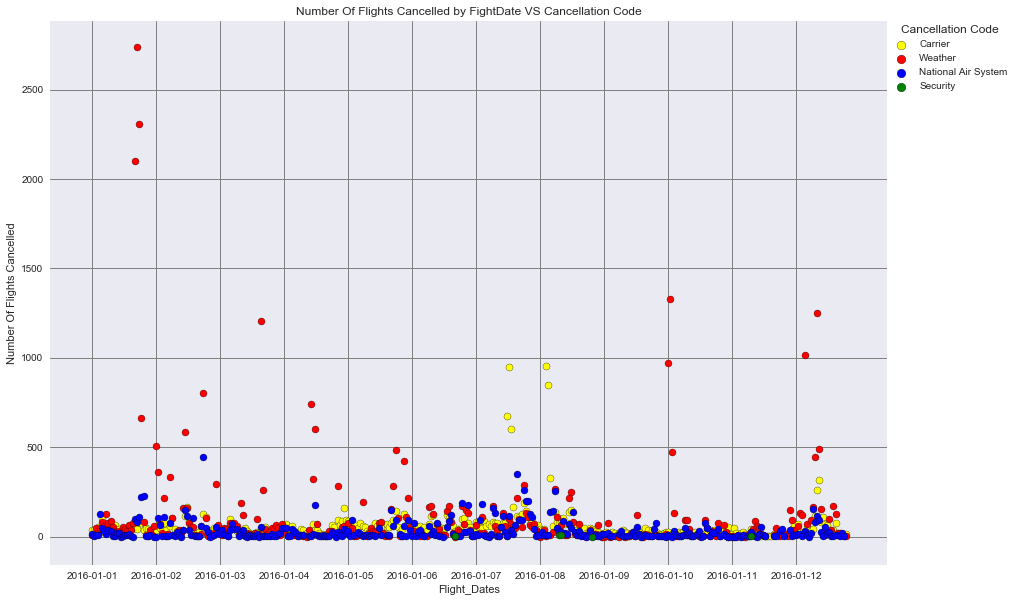

In [624]:
plt.figure(figsize=(15,10))
plt.scatter(cancelled_byday[cancelled_byday.CANCELLATION_CODE=='A']['FL_DATE'],
            cancelled_byday[cancelled_byday.CANCELLATION_CODE=='A']['FLIGHTS'],
           label='Carrier', color='yellow', edgecolors='black')
plt.scatter(cancelled_byday[cancelled_byday.CANCELLATION_CODE=='B']['FL_DATE'],
            cancelled_byday[cancelled_byday.CANCELLATION_CODE=='B']['FLIGHTS'],
           label='Weather', color='red', edgecolors='black')
plt.scatter(cancelled_byday[cancelled_byday.CANCELLATION_CODE=='C']['FL_DATE'],
            cancelled_byday[cancelled_byday.CANCELLATION_CODE=='C']['FLIGHTS'],
           label='National Air System', color='blue', edgecolors='black')
plt.scatter(cancelled_byday[cancelled_byday.CANCELLATION_CODE=='D']['FL_DATE'],
            cancelled_byday[cancelled_byday.CANCELLATION_CODE=='D']['FLIGHTS'],
           label='Security', color='Green', edgecolors='black')

ax=plt.gca()
# plt.xlim(0, 370)
# plt.ylim(0, 1000, 50)
plt.locator_params(axis='x', nbins = 12)
plt.grid(True)
plt.grid(color="grey")
plt.title("Number Of Flights Cancelled by FightDate VS Cancellation Code")
plt.xlabel('Flight_Dates')
plt.ylabel('Number Of Flights Cancelled')

#Create legend from custom artist/label lists
type1 = plt.scatter([],[], s=75, marker='o', color='yellow', edgecolors='black')
type2 = plt.scatter([],[], s=75, marker='o', color='red', edgecolors='black')
type3 = plt.scatter([],[], s=75, marker='o', color='blue', edgecolors='black')
type4 = plt.scatter([],[], s=75, marker='o', color='green', edgecolors='black')

sns.set()

plt.legend((type1,type2,type3,type4),
           ('Carrier', 'Weather', 'National Air System', 'Security'),
            scatterpoints=1,
            loc=2, 
            borderaxespad=0.,
            bbox_to_anchor=(1, 1),
            fontsize=10,
            title='Cancellation Code')

plt.show()

In [438]:
cancelled_byweek = cancelled_flights.groupby(["DAY_OF_WEEK","CANCELLATION_CODE"],as_index=False)
cancelled_byweek= cancelled_byweek["FLIGHTS"].count()
cancelled_byweek.head()

,DAY_OF_WEEK,CANCELLATION_CODE,FLIGHTS
0,1,A,3508
1,1,B,4682
2,1,C,1802
3,1,D,8
4,2,A,3746


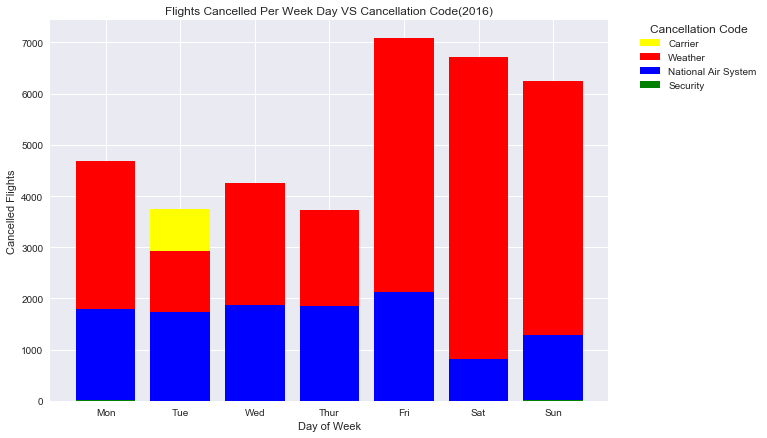

In [439]:
dfweeks = cancelled_byweek
plt.figure(figsize=(10,7))
dfa = dfweeks[dfweeks['CANCELLATION_CODE']=='A']
dfb = dfweeks[dfweeks['CANCELLATION_CODE']=='B']
dfc = dfweeks[dfweeks['CANCELLATION_CODE']=='C']
dfd = dfweeks[dfweeks['CANCELLATION_CODE']=='D']
pa = plt.bar(dfa.DAY_OF_WEEK, dfa.FLIGHTS, color = 'yellow', label ='Carrier')
pb = plt.bar(dfb.DAY_OF_WEEK, dfb.FLIGHTS, color = 'red', label ='Weather')
pc = plt.bar(dfc.DAY_OF_WEEK, dfc.FLIGHTS, color = 'blue', label ='National Air System')
pd = plt.bar(dfd.DAY_OF_WEEK, dfd.FLIGHTS, color = 'green', label ='Security')
plt.xticks(np.arange(1,8),("Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"))
plt.xlabel("Day of Week")
plt.ylabel("Cancelled Flights")
plt.title("Flights Cancelled Per Week Day VS Cancellation Code(2016)")
plt.legend(loc='upper left')
plt.legend (loc=2, 
            borderaxespad=0.,
            bbox_to_anchor=(1.05, 1),
            fontsize=10,
            title='Cancellation Code')
plt.show()

In [440]:
cancelled_byMonth = cancelled_flights.groupby(["MONTH","CANCELLATION_CODE"],as_index=False)
cancelled_byMonth= cancelled_byMonth["FLIGHTS"].count()
cancelled_byMonth.head()

,MONTH,CANCELLATION_CODE,FLIGHTS
0,1,A,1423
1,1,B,9054
2,1,C,1188
3,2,A,1574
4,2,B,3781


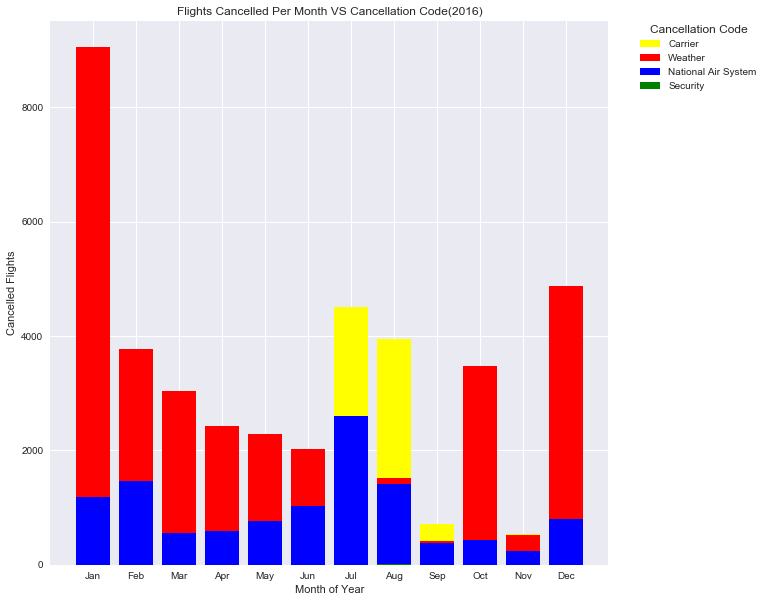

In [489]:
dfmonths = cancelled_byMonth
plt.figure(figsize=(10,10))
dfa = dfmonths[dfmonths['CANCELLATION_CODE']=='A']
dfb = dfmonths[dfmonths['CANCELLATION_CODE']=='B']
dfc = dfmonths[dfmonths['CANCELLATION_CODE']=='C']
dfd = dfmonths[dfmonths['CANCELLATION_CODE']=='D']
pa = plt.bar(dfa.MONTH, dfa.FLIGHTS, color = 'yellow', label ='Carrier')
pb = plt.bar(dfb.MONTH, dfb.FLIGHTS, color = 'red', label ='Weather')
pc = plt.bar(dfc.MONTH, dfc.FLIGHTS, color = 'blue', label ='National Air System')
pd = plt.bar(dfd.MONTH, dfd.FLIGHTS, color = 'green', label ='Security' )
plt.xticks(np.arange(1,13),("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"))
plt.xlabel("Month of Year")
plt.ylabel("Cancelled Flights")
plt.title("Flights Cancelled Per Month VS Cancellation Code(2016)")
plt.legend(loc='upper left')
plt.legend (loc=2, 
            borderaxespad=0.,
            bbox_to_anchor=(1.05, 1),
            fontsize=10,
            title='Cancellation Code')
plt.show()

In [442]:
cancelled_dayMonth = cancelled_flights.groupby(["DAY_OF_MONTH","CANCELLATION_CODE"],as_index=False)
cancelled_dayMonth= cancelled_dayMonth["FLIGHTS"].count()
cancelled_dayMonth.head()

,DAY_OF_MONTH,CANCELLATION_CODE,FLIGHTS
0,1,A,558
1,1,B,1200
2,1,C,401
3,2,A,678
4,2,B,1041


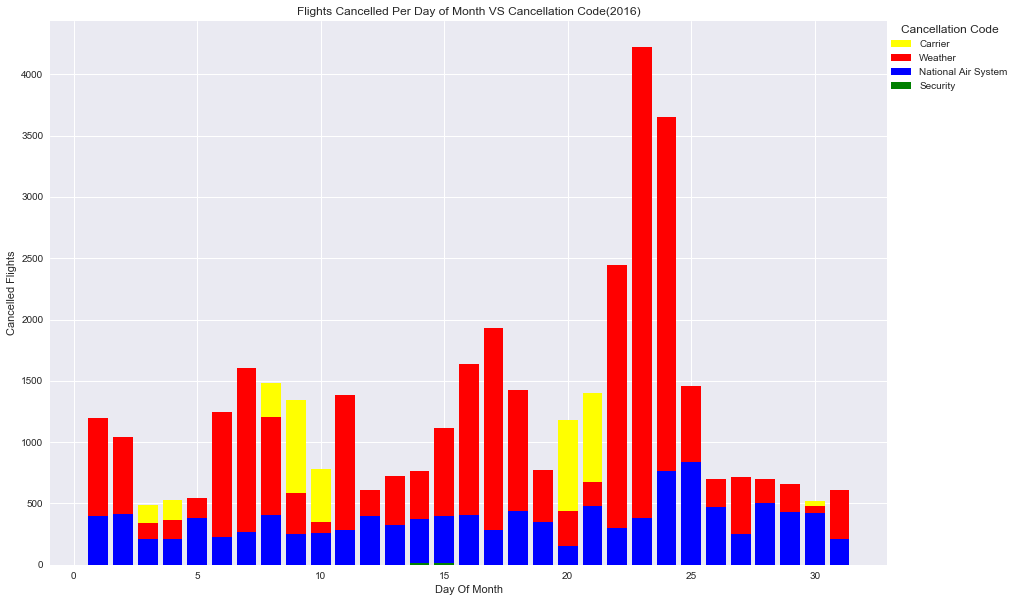

In [632]:
dfdaymonths = cancelled_dayMonth
plt.figure(figsize=(15,10))
dfa = dfdaymonths[dfdaymonths['CANCELLATION_CODE']=='A']
dfb = dfdaymonths[dfdaymonths['CANCELLATION_CODE']=='B']
dfc = dfdaymonths[dfdaymonths['CANCELLATION_CODE']=='C']
dfd = dfdaymonths[dfdaymonths['CANCELLATION_CODE']=='D']
pa = plt.bar(dfa.DAY_OF_MONTH, dfa.FLIGHTS, color = 'yellow', label ='Carrier')
pb = plt.bar(dfb.DAY_OF_MONTH, dfb.FLIGHTS, color = 'red', label ='Weather')
pc = plt.bar(dfc.DAY_OF_MONTH, dfc.FLIGHTS, color = 'blue', label ='National Air System')
pd = plt.bar(dfd.DAY_OF_MONTH, dfd.FLIGHTS, color = 'green', label ='Security' )
plt.xlabel("Day Of Month")
plt.ylabel("Cancelled Flights")
plt.title("Flights Cancelled Per Day of Month VS Cancellation Code(2016)")
plt.legend (loc=2, 
            borderaxespad=0.,
            bbox_to_anchor=(1, 1),
            fontsize=10,
            title='Cancellation Code')
plt.show()

In [444]:
diverted_flights = final_csv.loc[final_csv["DIVERTED"] == 1 ,:]
diverted_flights.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
240,19790,NaN,NaN,NaN,NaN,7.0,NaN,0.0,DL,NaN,...,1,NaN,SEA,14747,Seattle,WA,NaN,DL,NaN,2016
1505,19790,NaN,NaN,NaN,NaN,1937.0,NaN,0.0,DL,NaN,...,1,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016
2118,19790,NaN,NaN,NaN,NaN,756.0,NaN,0.0,DL,NaN,...,1,NaN,PHX,14107,Phoenix,AZ,NaN,DL,NaN,2016
3046,19790,NaN,NaN,NaN,NaN,2254.0,NaN,0.0,DL,NaN,...,1,NaN,BDL,10529,Hartford,CT,NaN,DL,NaN,2016
5389,19790,NaN,NaN,NaN,NaN,1258.0,NaN,0.0,DL,NaN,...,1,NaN,PDX,14057,Portland,OR,NaN,DL,NaN,2016


In [445]:
diverted_flightsbyweek = diverted_flights.groupby(["DAY_OF_WEEK"],as_index=False)
diverted_flightsbyweek= diverted_flightsbyweek["FLIGHTS"].count()
diverted_flightsbyweek


,DAY_OF_WEEK,FLIGHTS
0,1,2147
1,2,2417
2,3,2226
3,4,2269
4,5,2201
5,6,1679
6,7,2063


In [446]:
total_flights = final_csv.groupby(["DAY_OF_WEEK"],as_index=False)
total_flights = total_flights["FLIGHTS"].count()
total_flights

,DAY_OF_WEEK,FLIGHTS
0,1,909101
1,2,894053
2,3,888055
3,4,897552
4,5,914718
5,6,738554
6,7,854983


In [447]:
dflightsbyweek = diverted_flightsbyweek.merge(total_flights, how='left', on='DAY_OF_WEEK', left_index = False, right_index=False)
dflightsbyweek.rename(columns={'FLIGHTS_x': 'Diverted_Flights', 'FLIGHTS_y': 'Total_Flights'}, inplace=True)
dflightsbyweek.head(1)


,DAY_OF_WEEK,Diverted_Flights,Total_Flights
0,1,2147,909101


In [589]:
dflightsbyweek['Percent Flights'] = (dflightsbyweek['Diverted_Flights']/dflightsbyweek['Total_Flights'])*100
dflightsbyweek['Days'] = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
dflightsbyweek.head()

,DAY_OF_WEEK,Diverted_Flights,Total_Flights,Percent Flights,Days
0,1,2147,909101,0.236167,Mon
1,2,2417,894053,0.270342,Tue
2,3,2226,888055,0.250660,Wed
3,4,2269,897552,0.252799,Thur
4,5,2201,914718,0.240621,Fri


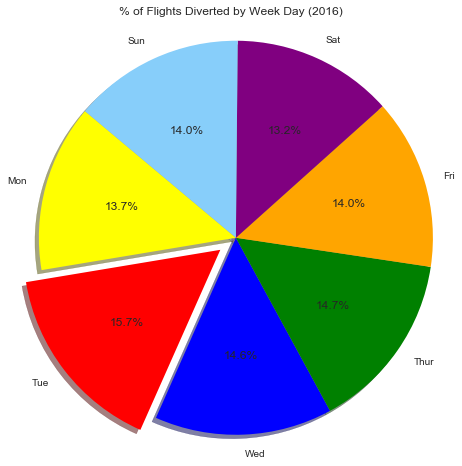

In [595]:
plt.figure(figsize=(8,8))
colors = ["yellow","red","blue","green","orange","purple","lightskyblue"]
explode = (0,0.1,0,0,0,0,0) 
plt.pie(dflightsbyweek['Percent Flights'], explode=explode, labels=dflightsbyweek['Days'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Flights Diverted by Week Day (2016)")
plt.axis('equal')
plt.show()

In [450]:
diverted_flightsbymonth = diverted_flights.groupby(["MONTH"],as_index=False)
diverted_flightsbymonth = diverted_flightsbymonth["FLIGHTS"].count()
diverted_flightsbymonth.head()


,MONTH,FLIGHTS
0,1,864
1,2,969
2,3,1103
3,4,819
4,5,2700


In [451]:
total_flightsbymonth = final_csv.groupby(["MONTH"],as_index=False)
total_flightsbymonth = total_flightsbymonth["FLIGHTS"].count()
total_flightsbymonth.head()

,MONTH,FLIGHTS
0,1,445827
1,2,423889
2,3,479122
3,4,461630
4,5,958716


In [452]:
dfbymonth = diverted_flightsbymonth.merge(total_flightsbymonth, how='left', on='MONTH', left_index = False, right_index=False)
dfbymonth.rename(columns={'FLIGHTS_x': 'Diverted_Flights', 'FLIGHTS_y': 'Total_Flights'}, inplace=True)
dfbymonth['Percent Flights'] = (dfbymonth['Diverted_Flights']/dfbymonth['Total_Flights'])*100
dfbymonth['Months'] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"]
dfbymonth.head()

,MONTH,Diverted_Flights,Total_Flights,Percent Flights,Months
0,1,864,445827,0.193797,Jan
1,2,969,423889,0.228598,Feb
2,3,1103,479122,0.230213,Mar
3,4,819,461630,0.177415,Apr
4,5,2700,958716,0.281627,May


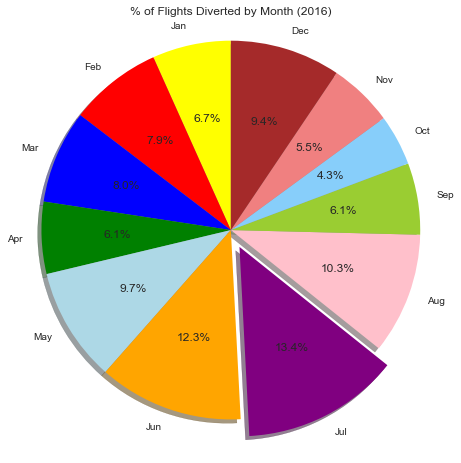

In [453]:
plt.figure(figsize=(8,8))
colors = ["yellow","red","blue","green","lightblue","orange","purple","pink","yellowgreen","lightskyblue","lightcoral",'brown']
explode = (0,0,0,0,0,0,0.1,0,0,0,0,0) 
plt.pie(dfbymonth['Percent Flights'], explode=explode, labels=dfbymonth['Months'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Flights Diverted by Month (2016)")
plt.axis('equal')
plt.show()

In [456]:
dep_delayed = final_csv.loc[final_csv["DEP_DEL15"] == 1 ,:]
dep_delayed.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016
5,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,DL,43.0,...,1,0.0,ATL,10397,Atlanta,GA,0.0,DL,0.0,2016
6,19790,37.0,1.0,NaN,74.0,1644.0,NaN,0.0,DL,3.0,...,1,0.0,BNA,10693,Nashville,TN,0.0,DL,0.0,2016
42,19790,129.0,0.0,NaN,2.0,2239.0,NaN,0.0,DL,NaN,...,1,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016
45,19790,192.0,1.0,NaN,28.0,1653.0,NaN,0.0,DL,28.0,...,1,0.0,MSP,13487,Minneapolis,MN,0.0,DL,0.0,2016


In [620]:
dep_delayed.DEP_TIME = dep_delayed.DEP_TIME.apply(int)

In [459]:
def addzero(row):
    if len(str(int(row)))==1:
        return '00'
    elif len(str(int(row)))==2:
        return '00'
    elif len(str(int(row))) == 3:
        return '0'+str(row)[0]
    else:
        return str(row)[:2]

In [621]:
dep_delayed['Delay_Hour'] = dep_delayed.DEP_TIME.apply(addzero)

In [622]:
dep_delayed.Delay_Hour = dep_delayed.Delay_Hour.apply(int)

In [463]:
dep_delayed.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR,Delay_Hour
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016,10
5,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,DL,43.0,...,0.0,ATL,10397,Atlanta,GA,0.0,DL,0.0,2016,13
6,19790,37.0,1.0,NaN,74.0,1644.0,NaN,0.0,DL,3.0,...,0.0,BNA,10693,Nashville,TN,0.0,DL,0.0,2016,14
42,19790,129.0,0.0,NaN,2.0,2239.0,NaN,0.0,DL,NaN,...,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016,20
45,19790,192.0,1.0,NaN,28.0,1653.0,NaN,0.0,DL,28.0,...,0.0,MSP,13487,Minneapolis,MN,0.0,DL,0.0,2016,15


In [464]:
depdelay_carrier = dep_delayed.groupby(["Delay_Hour","CARRIER"],as_index=False)
depdelay_carrier=  depdelay_carrier["DEP_DELAY_NEW"].mean()
depdelay_carrier.head()

,Delay_Hour,CARRIER,DEP_DELAY_NEW
0,0,AA,110.308365
1,0,AS,71.724252
2,0,B6,89.272047
3,0,DL,137.556185
4,0,EV,187.870886


In [465]:
colors = ["yellow","red","blue","green","lightblue","orange","purple","pink","yellowgreen","magenta","lightcoral",'brown']

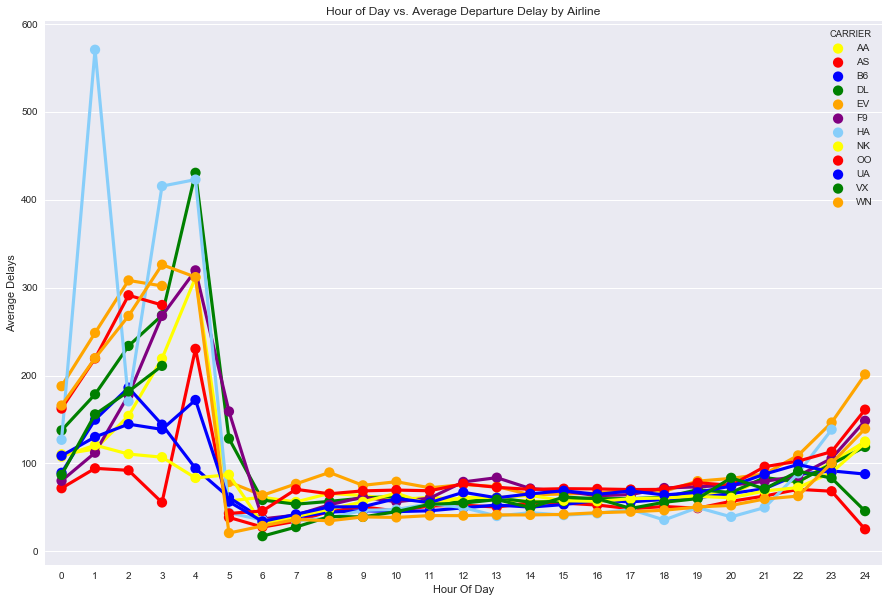

In [598]:
plt.figure(figsize=(15,10))
plt.title('Hour of Day vs. Average Departure Delay by Airline')
sns.pointplot('Delay_Hour','DEP_DELAY_NEW',data=depdelay_carrier,hue='CARRIER',palette=colors, linestyles='-')
plt.xlabel("Hour Of Day")
plt.ylabel("Average Delays")
plt.show()

In [467]:
dep_delayed = final_csv.loc[final_csv["DEP_DEL15"] == 1 ,:]
dep_delayed.head()

,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,CARRIER,CARRIER_DELAY,...,MONTH,NAS_DELAY,ORIGIN,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
4,19790,121.0,1.0,NaN,124.0,1420.0,NaN,0.0,DL,72.0,...,1,52.0,BZN,10849,Bozeman,MT,0.0,DL,0.0,2016
5,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,DL,43.0,...,1,0.0,ATL,10397,Atlanta,GA,0.0,DL,0.0,2016
6,19790,37.0,1.0,NaN,74.0,1644.0,NaN,0.0,DL,3.0,...,1,0.0,BNA,10693,Nashville,TN,0.0,DL,0.0,2016
42,19790,129.0,0.0,NaN,2.0,2239.0,NaN,0.0,DL,NaN,...,1,NaN,FLL,11697,Fort Lauderdale,FL,NaN,DL,NaN,2016
45,19790,192.0,1.0,NaN,28.0,1653.0,NaN,0.0,DL,28.0,...,1,0.0,MSP,13487,Minneapolis,MN,0.0,DL,0.0,2016


In [473]:
airport_csv = pd.read_csv("airports.csv", encoding='latin1')


In [475]:
airport_csv.drop('Unnamed: 0',axis=1,inplace=True)

In [476]:
airport_csv.head()

,Airport,ORIGIN
0,Atlanta,ATL
1,Los Angeles International Airport,LAX
2,O'Hare International Airport,ORD
3,Dallas/Fort Worth International Airport,DFW
4,John F. Kennedy International Airport,JFK


In [477]:
Origin_airports = pd.merge(airport_csv,dep_delayed,how='left',left_on='ORIGIN',right_on='ORIGIN')

In [479]:
Origin_airports.head()

,Airport,ORIGIN,AIRLINE_ID,AIR_TIME,ARR_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_TIME,CANCELLATION_CODE,CANCELLED,...,LATE_AIRCRAFT_DELAY,MONTH,NAS_DELAY,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,SECURITY_DELAY,UNIQUE_CARRIER,WEATHER_DELAY,YEAR
0,Atlanta,ATL,19790,38.0,1.0,NaN,83.0,1402.0,NaN,0.0,...,40.0,1,0.0,10397,Atlanta,GA,0.0,DL,0.0,2016
1,Atlanta,ATL,19790,66.0,1.0,NaN,15.0,1800.0,NaN,0.0,...,7.0,1,0.0,10397,Atlanta,GA,0.0,DL,0.0,2016
2,Atlanta,ATL,19790,70.0,1.0,NaN,33.0,1916.0,NaN,0.0,...,23.0,1,0.0,10397,Atlanta,GA,0.0,DL,0.0,2016
3,Atlanta,ATL,19790,90.0,1.0,NaN,108.0,1854.0,NaN,0.0,...,0.0,1,0.0,10397,Atlanta,GA,0.0,DL,0.0,2016
4,Atlanta,ATL,19790,49.0,1.0,NaN,47.0,1452.0,NaN,0.0,...,0.0,1,0.0,10397,Atlanta,GA,0.0,DL,0.0,2016


In [585]:
delaybyorigin = Origin_airports.groupby('Airport',as_index=False)
delaybyorigin = delaybyorigin["DEP_DELAY_NEW"].mean()
sorted_df = delaybyorigin.sort_values('DEP_DELAY_NEW')
sorted_df.head()


,Airport,DEP_DELAY_NEW
15,Midway International Airport,47.918195
21,Phoenix Sky Harbor International Airport,53.208665
27,SeattleTacoma International Airport,53.975899
1,BaltimoreWashington International Airport,54.430399
4,Daniel K. Inouye International Airport,55.499875


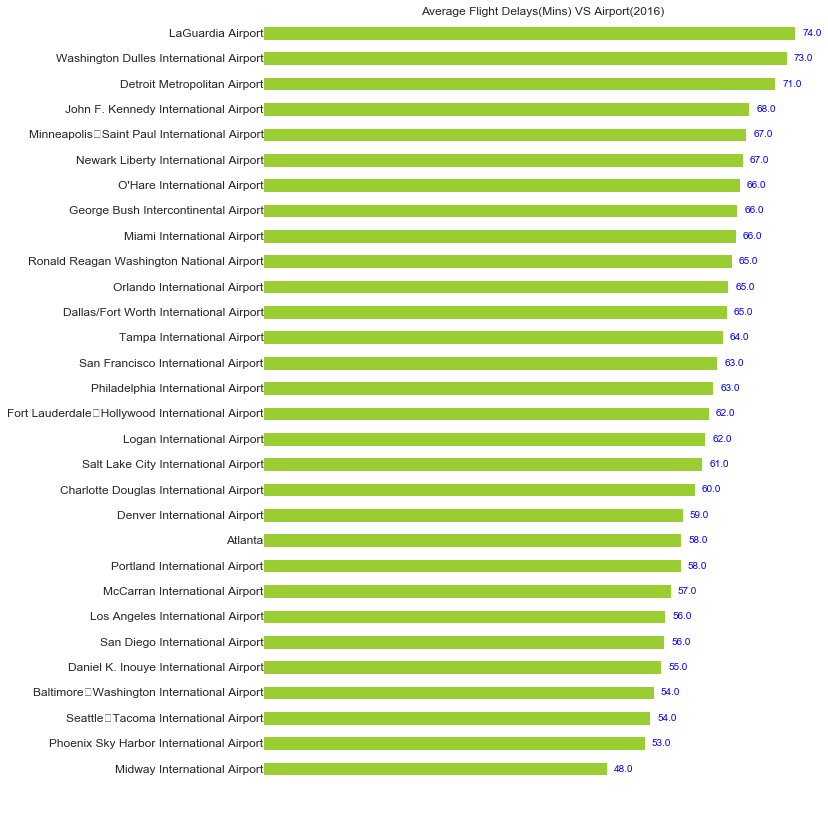

In [687]:
plt.figure(figsize=(10,14))
#subplot grid parameters. 
ax = plt.subplot(111)
bars = sorted_df['DEP_DELAY_NEW'].plot(ax=ax, kind='barh', color='yellowgreen')
#turns off adding column names
ax.axis('off')
#Iterate over indices and items of a list
for i, x in enumerate(sorted_df['Airport']):
    ax.text(0, i + .2 , x,  ha='right', va='top', fontsize='medium' )
for i, v in enumerate(sorted_df['DEP_DELAY_NEW']):
    ax.text(v + 1, i + .2, str(round(v)), color='blue', ha='left', va='top', fontsize='small')
plt.xlabel("Average Flight Delays(Mins)")
plt.ylabel("Origin Airports")
plt.title("Average Flight Delays(Mins) VS Airport(2016)")

plt.show()

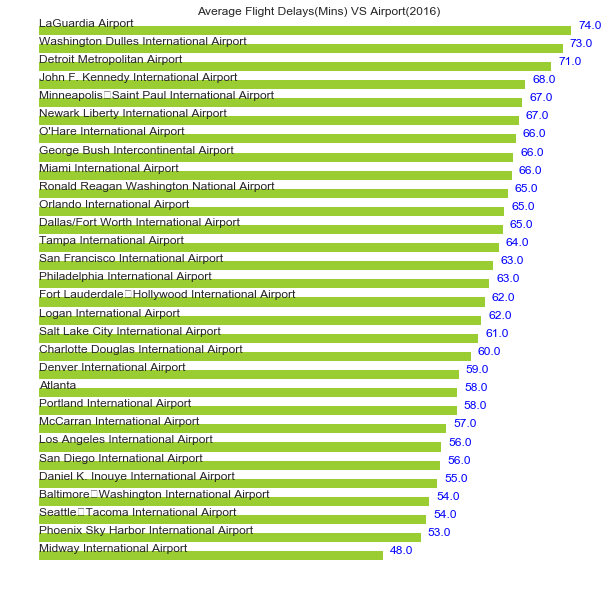

In [662]:
plt.figure(figsize=(10,10))
#subplot grid parameters. 
ax = plt.subplot(111)
bars = sorted_df['DEP_DELAY_NEW'].plot(ax=ax, kind='barh',  color='yellowgreen')
#turns off adding column names
ax.axis('off')
#Iterate over indices and items of a list
for i, x in enumerate(sorted_df['Airport']):
    ax.text(0, i + .2 , x, fontsize='medium' )
for i, v in enumerate(sorted_df['DEP_DELAY_NEW']):
    ax.text(v + 1, i + .25, str(round(v)), color='blue', va = 'center')
plt.xlabel("Average Flight Delays(Mins)")
plt.ylabel("Origin Airports")
plt.title("Average Flight Delays(Mins) VS Airport(2016)")

plt.show()